Скачать ценовые ряды акций двух любых компаний за три месяца с частотой -30 минут. Выполнить тестирование рядов по схеме в файле Untaitled34

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
from scipy import stats

In [129]:
apple=pd.read_csv('apple.csv',sep=',')
apple.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,01/06/20,10:30:00,319.24,320.00,318.57,319.60,625
1,01/06/20,11:00:00,319.63,319.99,319.00,319.52,206
2,01/06/20,11:30:00,319.51,319.51,315.50,315.87,1.766
3,01/06/20,12:00:00,315.99,316.72,315.80,316.64,711
4,01/06/20,12:30:00,316.64,316.99,316.25,316.53,283


In [130]:
star=pd.read_csv('star.csv',sep=',')
star.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,01/06/20,10:30:00,78.53,79.08,78.53,78.96,424
1,01/06/20,11:00:00,78.85,78.99,78.78,78.78,36
2,01/06/20,11:30:00,78.97,78.97,77.40,77.40,106
3,01/06/20,12:00:00,77.40,78.40,77.16,77.40,70
4,01/06/20,12:30:00,77.88,78.15,77.48,77.48,346


In [131]:
starcol = star.columns.to_list()
starcol

['<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>']

Статистические данные для каждой котировки:

In [132]:
star.describe()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
count,5242.000000,5242.000000,5242.000000,5242.000000
mean,88.007892,88.198398,87.808499,88.008941
std,10.758154,10.774028,10.743274,10.761757
min,70.340000,70.490000,70.210000,70.390000
25%,77.490000,77.682500,77.330000,77.480000
50%,86.925000,87.110000,86.680000,86.900000
75%,98.387500,98.550000,98.220000,98.407500
max,108.000000,108.000000,107.900000,108.000000


In [133]:
apple.describe()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
count,5371.000000,5371.000000,5371.000000,5371.000000
mean,226.335671,226.886276,225.744003,226.362793
std,137.006142,137.281823,136.734895,137.044589
min,103.600000,104.520000,101.390000,103.570000
25%,117.945000,118.290000,117.510000,117.935000
50%,130.750000,131.040000,130.350000,130.730000
75%,365.100000,365.870000,364.515000,365.100000
max,514.800000,516.490000,513.300000,514.790000


Посмотрим, в какие дни цена акций была ниже среднего

In [134]:
apple_mean = apple['<OPEN>'].mean()
apple_highmean = apple[apple['<OPEN>'] <= apple_mean]['<DATE>']
apple_highmean

2048    31/08/20
2049    31/08/20
2050    31/08/20
2051    31/08/20
2052    31/08/20
          ...   
5366    01/02/21
5367    01/02/21
5368    01/02/21
5369    02/02/21
5370    02/02/21
Name: <DATE>, Length: 3323, dtype: object

In [135]:
star_mean = star['<OPEN>'].mean()
star_highmean = star[star['<OPEN>'] <= star_mean]['<DATE>']
star_highmean

0       01/06/20
1       01/06/20
2       01/06/20
3       01/06/20
4       01/06/20
          ...   
3357    03/11/20
3358    03/11/20
3362    03/11/20
3364    03/11/20
3366    03/11/20
Name: <DATE>, Length: 2814, dtype: object

In [136]:
from pandas import plotting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8284a842b0>,
      dtype=object)

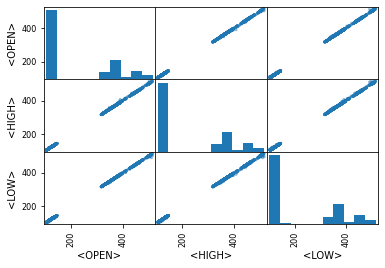

In [137]:
plotting.scatter_matrix(apple[['<OPEN>','<HIGH>','<LOW>']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8285d2c190>,
      dtype=object)

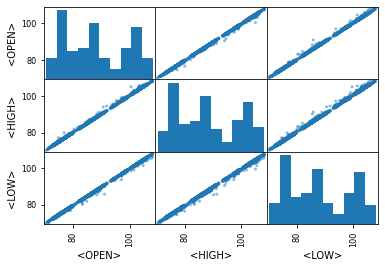

In [138]:
plotting.scatter_matrix(star[['<OPEN>','<HIGH>','<LOW>']])

In [139]:
from scipy import stats

In [140]:
stats.ttest_1samp(apple['<OPEN>'], 0)

Ttest_1sampResult(statistic=121.07111533577796, pvalue=0.0)

In [141]:
stats.ttest_1samp(star['<OPEN>'], 0)

Ttest_1sampResult(statistic=592.2872393290735, pvalue=0.0)

Построим графики изменения цен

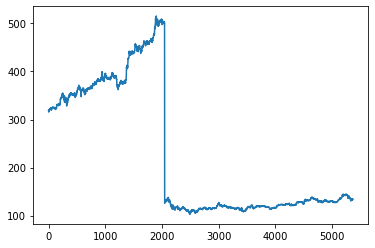

In [142]:
apple['<OPEN>'].plot()
plt.show()

Наблюдаем резкое падение цены с ~500 до почти 100. Посмотрим, когда такое падение произошло

In [143]:
data = apple[apple['<OPEN>'] > 500]['<DATE>']
data

1888    24/08/20
1889    24/08/20
1890    24/08/20
1891    24/08/20
1892    24/08/20
          ...   
2040    28/08/20
2041    28/08/20
2045    29/08/20
2046    29/08/20
2047    29/08/20
Name: <DATE>, Length: 132, dtype: object

In [144]:
data = apple[apple['<OPEN>'] < 150]['<DATE>']
data

2048    31/08/20
2049    31/08/20
2050    31/08/20
2051    31/08/20
2052    31/08/20
          ...   
5366    01/02/21
5367    01/02/21
5368    01/02/21
5369    02/02/21
5370    02/02/21
Name: <DATE>, Length: 3323, dtype: object

Мы можем видеть, что  28/08/20 цена акций apple была больше 500, а уже 31/08/20 снизилась до 150.

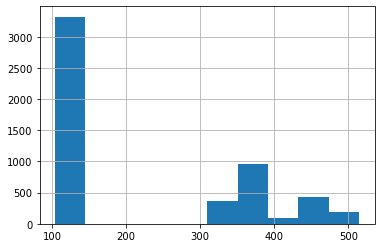

In [145]:
apple['<OPEN>'].hist()

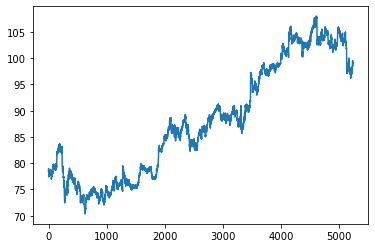

In [146]:
star['<OPEN>'].plot()
plt.show()

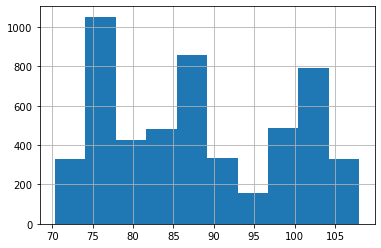

In [147]:
star['<OPEN>'].hist()

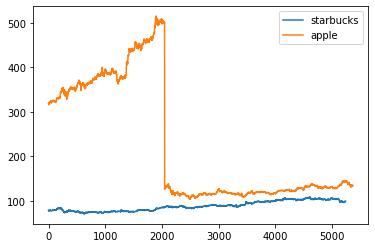

In [148]:
plt.plot(star['<OPEN>'])
plt.plot(apple['<OPEN>'])
plt.legend(["starbucks", "apple"])
plt.show()

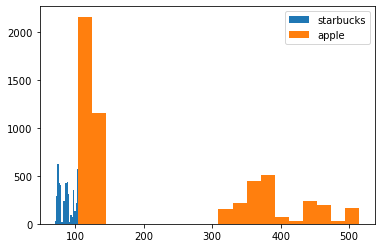

In [149]:
plt.subplot(1,1,1)
plt.hist(star['<OPEN>'], bins=20)
plt.hist(apple['<OPEN>'], bins=20)
plt.legend(["starbucks", "apple"])
plt.show()

Проверим тесты на наших данных

In [150]:
sstr='%-16s mean=%6.4f,  var= %6.4f, skew= %6.4f,  kurt= %6.4f '
n, (smin, smax), sm, sv , ss, sk=stats.describe(apple['<OPEN>'])
print( sstr % (' sample: ', sm, sv , ss, sk))

 sample:         mean=226.3357,  var= 18770.6831, skew= 0.6652,  kurt= -1.2868 


In [151]:
print('KS-stat   D=%6.3f pvalue = %6.4f' % stats.kstest(apple['<OPEN>'],'norm'))

KS-stat   D= 1.000 pvalue = 0.0000


In [152]:
print('KS-stat   D=%6.3f pvalue = %6.4f' % stats.kstest(apple['<OPEN>'],'t',(12,)))

KS-stat   D= 1.000 pvalue = 0.0000


In [153]:
quantiles = [0.0, 0.01, 0.05, 0.1, 1-0.10, 1-0.05, 1-0.01, 1.0]
crit = stats.t.ppf(quantiles, 10)
print(crit)
n_sample = apple['<OPEN>'].size
freqcount = np.histogram(apple['<OPEN>'], bins=crit)[0]
tprob = np.diff(quantiles)
nprob = np.diff(stats.norm.cdf(crit))
tch, tpval = stats.chisquare(freqcount, tprob*n_sample)
nch, npval = stats.chisquare(freqcount, nprob*n_sample)
print('chisquare for t:      chi2 = %6.2f pvalue = %6.4f' % (tch, tpval))
print('chisquare for normal: chi2 = %6.2f pvalue = %6.4f' % (nch, npval))

[       -inf -2.76376946 -1.81246112 -1.37218364  1.37218364  1.81246112
  2.76376946         inf]
chisquare for t:      chi2 = 531729.00 pvalue = 0.0000
chisquare for normal: chi2 = 1874642.30 pvalue = 0.0000


In [154]:
print('normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(apple['<OPEN>']))
print('normal kurtosistest teststat = %6.3f pvalue = %6.4f' % stats.kurtosistest(apple['<OPEN>']))

normal skewtest teststat = 18.208 pvalue = 0.0000
normal kurtosistest teststat = -116.831 pvalue = 0.0000


In [155]:
stats.ks_2samp(apple['<OPEN>'], star['<OPEN>'])

KstestResult(statistic=0.9894453453768528, pvalue=0.9999999999999996)

In [156]:
stats.ttest_ind(apple['<OPEN>'], star['<OPEN>'])

Ttest_indResult(statistic=72.88103938879303, pvalue=0.0)

In [162]:
sstr='%-16s mean=%6.4f,  var= %6.4f, skew= %6.4f,  kurt= %6.4f '
n, (smin, smax), sm, sv , ss, sk=stats.describe(star['<OPEN>'])
print( sstr % (' sample: ', sm, sv , ss, sk))

 sample:         mean=88.0079,  var= 115.7379, skew= 0.2313,  kurt= -1.3260 


In [163]:
print('KS-stat   D=%6.3f pvalue = %6.4f' % stats.kstest(star['<OPEN>'],'norm'))

KS-stat   D= 1.000 pvalue = 0.0000


In [164]:
print('KS-stat   D=%6.3f pvalue = %6.4f' % stats.kstest(star['<OPEN>'],'t',(12,)))

KS-stat   D= 1.000 pvalue = 0.0000


In [165]:
quantiles = [0.0, 0.01, 0.05, 0.1, 1-0.10, 1-0.05, 1-0.01, 1.0]
crit = stats.t.ppf(quantiles, 10)
print(crit)
n_sample = star['<OPEN>'].size
freqcount = np.histogram(star['<OPEN>'], bins=crit)[0]
tprob = np.diff(quantiles)
nprob = np.diff(stats.norm.cdf(crit))
tch, tpval = stats.chisquare(freqcount, tprob*n_sample)
nch, npval = stats.chisquare(freqcount, nprob*n_sample)
print('chisquare for t:      chi2 = %6.2f pvalue = %6.4f' % (tch, tpval))
print('chisquare for normal: chi2 = %6.2f pvalue = %6.4f' % (nch, npval))

[       -inf -2.76376946 -1.81246112 -1.37218364  1.37218364  1.81246112
  2.76376946         inf]
chisquare for t:      chi2 = 518958.00 pvalue = 0.0000
chisquare for normal: chi2 = 1829617.38 pvalue = 0.0000


In [166]:
print('normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(star['<OPEN>']))
print('normal kurtosistest teststat = %6.3f pvalue = %6.4f' % stats.kurtosistest(star['<OPEN>']))

normal skewtest teststat =  6.758 pvalue = 0.0000
normal kurtosistest teststat = -214.744 pvalue = 0.0000


Посмотрим распределения доходности компаний

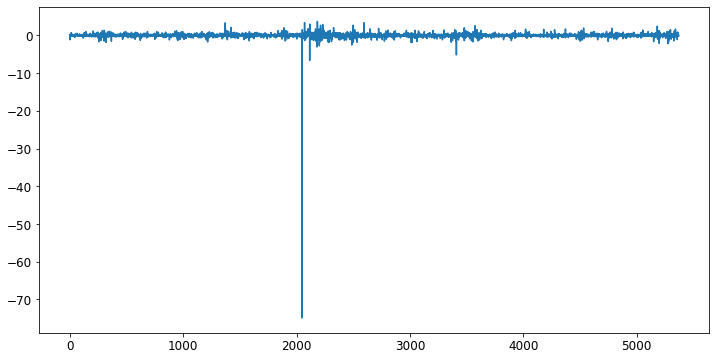

In [157]:
apple['<CHANGE>'] = apple['<CLOSE>'].pct_change()*100
apple['<CHANGE>'].plot(figsize = (12, 6), fontsize = 12)

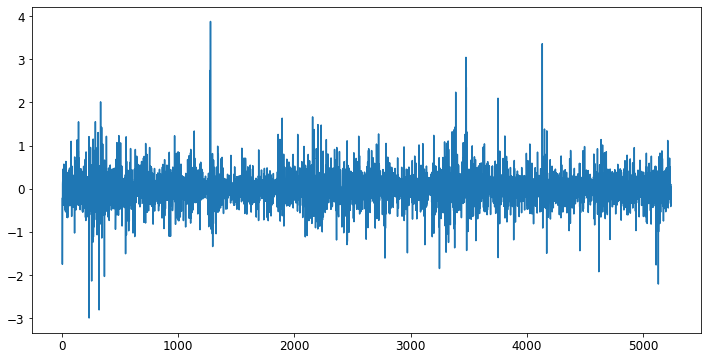

In [158]:
star['<CHANGE>'] = star['<CLOSE>'].pct_change()*100
star['<CHANGE>'].plot(figsize = (12, 6), fontsize = 12)

Графики распределения доходности:

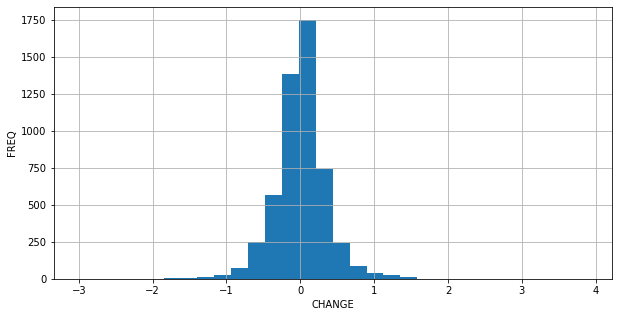

In [159]:
star['<CHANGE>'].hist(bins = 30, figsize = (10,5))
plt.xlabel('CHANGE')
plt.ylabel('FREQ')
plt.show()

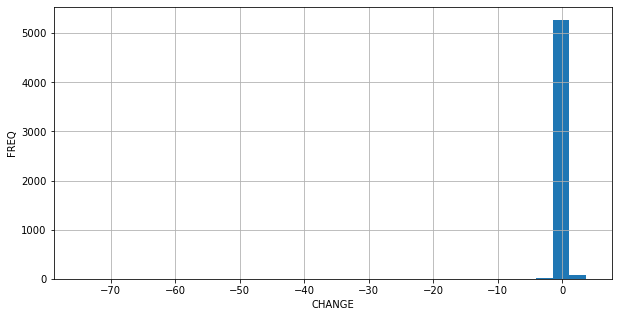

In [160]:
apple['<CHANGE>'].hist(bins = 30, figsize = (10,5))
plt.xlabel('CHANGE')
plt.ylabel('FREQ')
plt.show()

Как мы видим, доходность компании apple в заданный промежуток времени в основном была отрицательной

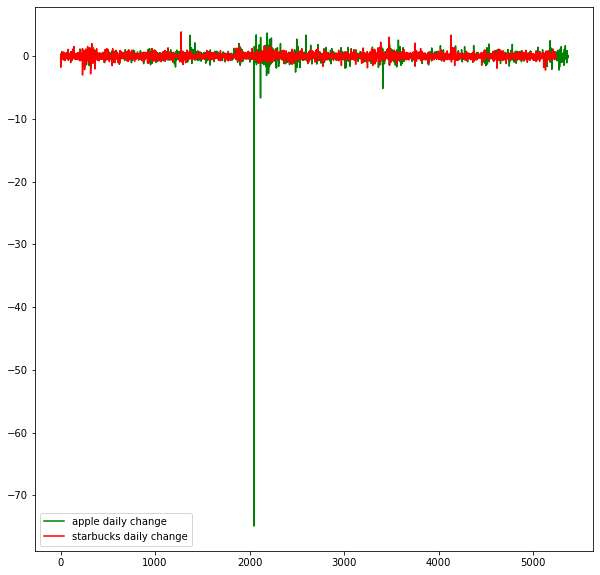

In [161]:
plt.figure(figsize=(10,10))
plt.plot(apple['<CHANGE>'], 'g', label="apple daily change")
plt.plot(star['<CHANGE>'], 'r', label="starbucks daily change")
plt.legend()
plt.show()